In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

In [2]:
#google ='C:\Users\Clarissa Shakeel\GoogleData'
Google = pd.read_csv('googleplaystore.csv')

In [3]:
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]

In [4]:
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
Apple = pd.read_csv('AppleStore.csv')

In [6]:
Apple =Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

In [7]:
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


In [8]:
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [9]:
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [10]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [11]:
Google[Google['Price']=='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [12]:
Google = Google[Google['Price'] != 'Everyone']


In [13]:
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [14]:
nosymb = Google['Price'].str.replace('$','')

C:\Users\Clarissa Shakeel\AppData\Local\Temp\ipykernel_3992\3186970690.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nosymb = Google['Price'].str.replace('$','')


In [15]:
Google['Price'] = pd.to_numeric(nosymb)

In [16]:
Google.dtypes


Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [17]:
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [18]:
Apple['platform'] = 'apple'
Google['platform'] = 'google'

In [19]:
old_names = Apple.columns

In [20]:
new_names = ['Category','Rating','Reviews','Price']

In [21]:
Apple = Apple.rename(columns = dict(zip(old_names,new_names)))

In [22]:
df =Google.append(Apple, ignore_index= True)

C:\Users\Clarissa Shakeel\AppData\Local\Temp\ipykernel_3992\1182741051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =Google.append(Apple, ignore_index= True)


In [23]:
df.sample(12)

,Category,Rating,Reviews,Price,platform
5837,FAMILY,NaN,0,0.00,google
12887,Utilities,4.5,1525,0.00,apple
13383,Games,4.5,157882,0.00,apple
1601,LIFESTYLE,4.6,34782,0.00,google
6748,FAMILY,4.3,1895,0.00,google
4340,PERSONALIZATION,3.9,2852,0.00,google
1908,GAME,4.5,14892469,0.00,google
10522,MEDICAL,4.4,1517,0.00,google
8196,GAME,4.1,39895,0.00,google
1780,GAME,4.6,48256,0.00,google


In [24]:
print(df.shape)

(18037, 5)


In [25]:
df =  df.dropna()

In [26]:
print(df.shape)

(16563, 5)


In [27]:
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [28]:
df = df[df['Reviews'] != 0]

In [29]:
df.groupby(by='platform' )['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


df.boxplot(by= 'platform' , column = 'Rating', grid=False, rot=45, fontsize=15)

In [32]:
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform']== 'google']['Rating']

In [33]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [34]:
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


## p-values is 0 for both tests, our conclusion is that the data are ___NOT___ normally distributed.

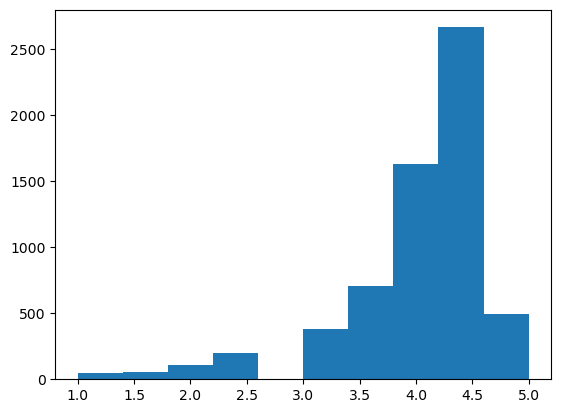

In [44]:
histoApple = plt.hist(apple)

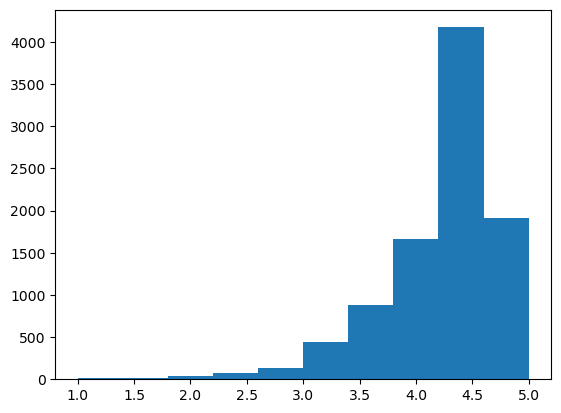

In [45]:
histoApple = plt.hist(google)

In [46]:
df['Permutation1'] = np.random.permutation(df['Rating'])

In [47]:
df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.126117,0.630021,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.140615,0.601224,1.0,4.0,4.3,4.5,5.0


In [49]:
difference = list()

In [50]:
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

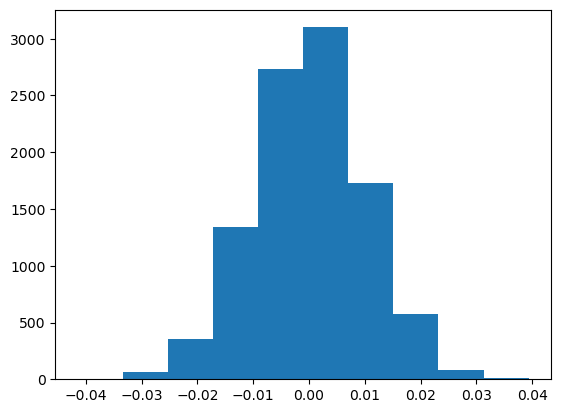

In [51]:
histo = plt.hist(difference)

In [54]:
obs_difference = np.mean(apple) - np.mean(google)

In [55]:
obs_difference = abs(obs_difference)
obs_difference 

0.14206054745123442

In [56]:
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

0
0


###We conclude that platform does impact on ratings. Specifically, we should advise our client to integrate only **Google Play** into their operating system interface

In [57]:
positiveExtremes

[]

In [58]:
negativeExtremes

[]